### Simple Linear Regression

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('height-weight.csv')

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


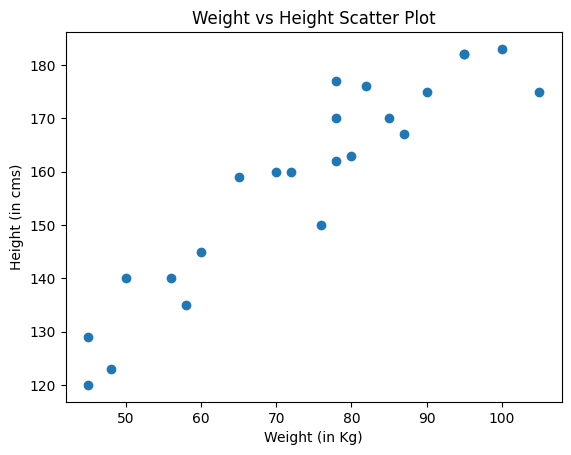

In [5]:
# Scatter Plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight (in Kg)')
plt.ylabel('Height (in cms)')
plt.title('Weight vs Height Scatter Plot')
plt.show()

In [6]:
# Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


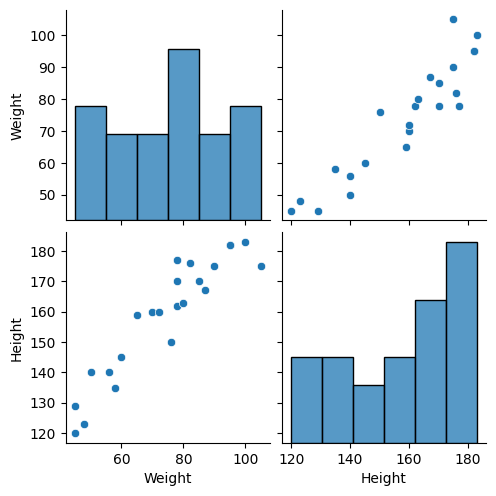

In [7]:
# Pair Plot
sns.pairplot(df)

In [8]:
# Independent and dependent features
X = df[['Weight']]  # independent feature -> dataframe
y = df['Height']    # dependent feature -> series


In [9]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [11]:
# Standardization
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # mean = 0, Std. Dev. = 1

In [13]:
X_test = scaler.transform(X_test)

In [14]:
# Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [15]:
regression = LinearRegression()

In [16]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
print("Coefficient:",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient: [17.2982057]
Intercept: 156.47058823529412


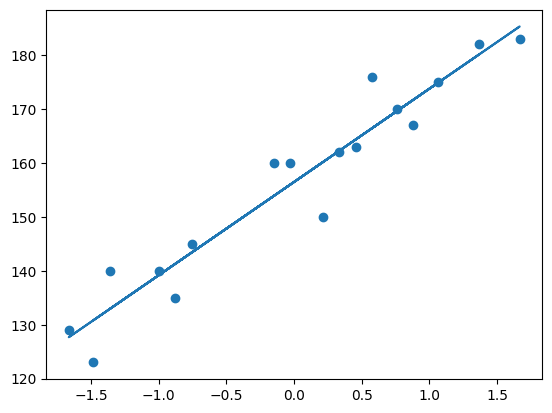

In [18]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [20]:
# Prediction for test data
y_pred = regression.predict(X_test)

In [21]:
# Performance Matrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


In [23]:
# R Square
from sklearn.metrics import r2_score

In [24]:
score = r2_score(y_test, y_pred)
print(score)

0.7360826717981276


In [26]:
# OLS Linear Regression
import statsmodels.api as sm

In [27]:
model = sm.OLS(y_train,X_train).fit()

In [28]:
prediction = model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [30]:
# Prediction for new data
regression.predict(scaler.transform([[72]]))

C:\Users\Aditya\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])